## Imports

In [76]:
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns  
import pandas as pd 
import datetime  
from datetime import datetime  # Import datetime class from datetime module
from binance.client import Client  # Import Client class from binance.client module for interacting with Binance API

# Initialise Binance Client
api_key = "zvbkdnp5VMDAdtX4WMNtmxQC4wbVukTcTpX3PRrs1UYIz9T2zW5j5uNAJagdCq04"    # Binance API key
secret_key = "KcoIju1CD9ULVV5e2KlIgfPsQNGkYcEM1r0DMcv5bic9EC8e7zURdeeR5UOUJ5ZZ"  # Binance API secret key
client = Client(api_key, secret_key)  # Create Binance client object using the given keys

This code enables a connection to the Binance cryptocurrency exchange API by utilising a number of Python libraries. It allows further activities, like trading and data retrieval.

## Visualisations

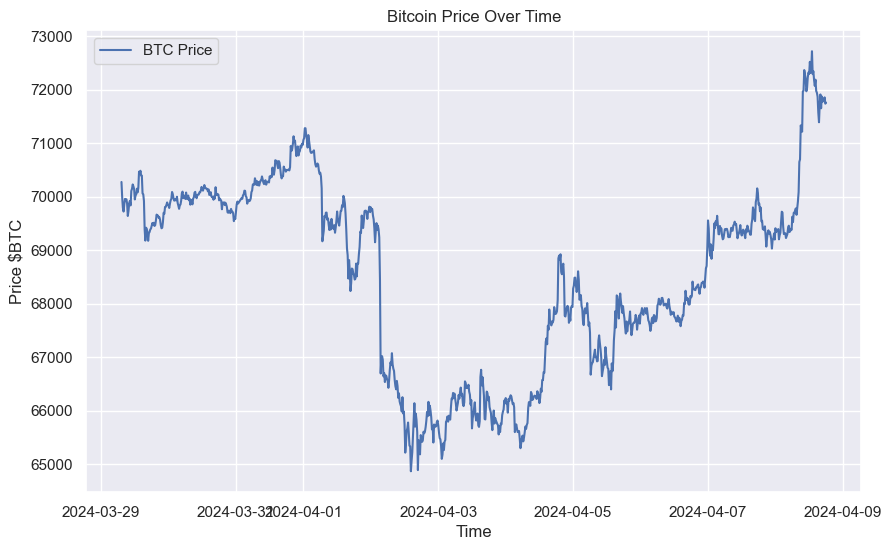

In [77]:
# Fetch Bitcoin data with a larger limit of 1000 data points
candles = client.get_klines(symbol='BTCUSDT', interval=Client.KLINE_INTERVAL_15MINUTE, limit=1000)

# Extract close prices and times from the candlestick data
price = np.array([float(candle[4]) for candle in candles])  # Closing prices
time = np.array([int(candle[0]) for candle in candles])  # Timestamps

# Convert timestamps to a readable format
t = np.array([datetime.fromtimestamp(time[i]/1000).strftime('%Y-%m-%d %H:%M:%S') for i in range(len(time))])

# Create a DataFrame containing time and BTC price data
btc_df = pd.DataFrame({'Time': t, 'Price $BTC': price})

# Convert the 'Time' column to datetime format for easier manipulation
btc_df['Time'] = pd.to_datetime(btc_df['Time'])

# Plot the closing prices of Bitcoin over time
plt.figure(figsize=(10, 6))
plt.plot(btc_df['Time'], btc_df['Price $BTC'], label='BTC Price')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Time')
plt.ylabel('Price $BTC')
plt.legend()
plt.show()


This code uses the Binance API to retrieve historical Bitcoin price data. It takes the information collected, transforms the timestamps to a readable format and organises it into a dataframe. Then it uses Matplotlib to plot the Bitcoin price trend over time. This visualisation helps in the analysis of previous price changes, leading to more educated trading and investing decisions.

In [78]:
len(candles)

1000

In [79]:
# Descriptive Statistics
print(btc_df['Price $BTC'].describe())

count     1000.000000
mean     68538.139750
std       1770.979565
min      64867.990000
25%      66944.262500
50%      69200.605000
75%      69912.897500
max      72719.990000
Name: Price $BTC, dtype: float64


Statistics are summarised. Contains counts, mean, standard deviation, minimum, 25th percentile, median, 75th percentile and maximum values.


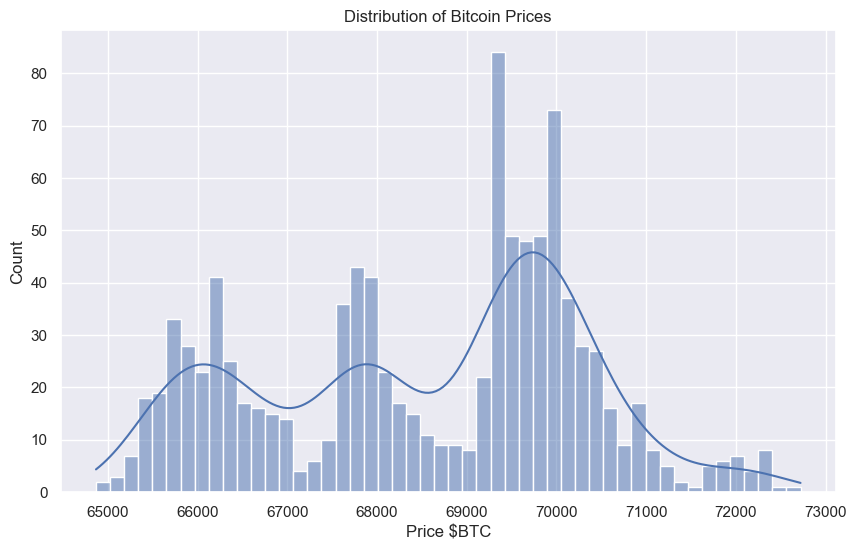

In [80]:
# Plot a distribution of the Bitcoin prices
plt.figure(figsize=(10, 6))
sns.histplot(btc_df['Price $BTC'], kde=True, bins=50)
plt.title('Distribution of Bitcoin Prices')
plt.show()

This code creates a histogram using kernel density estimation (KDE) to show the distribution of Bitcoin values. It takes Seaborn's 'histplot' function to plot the distribution with 50 bins, providing data regarding the frequency of Bitcoin price fluctuations.


## Technical Analysis and Visualisation.

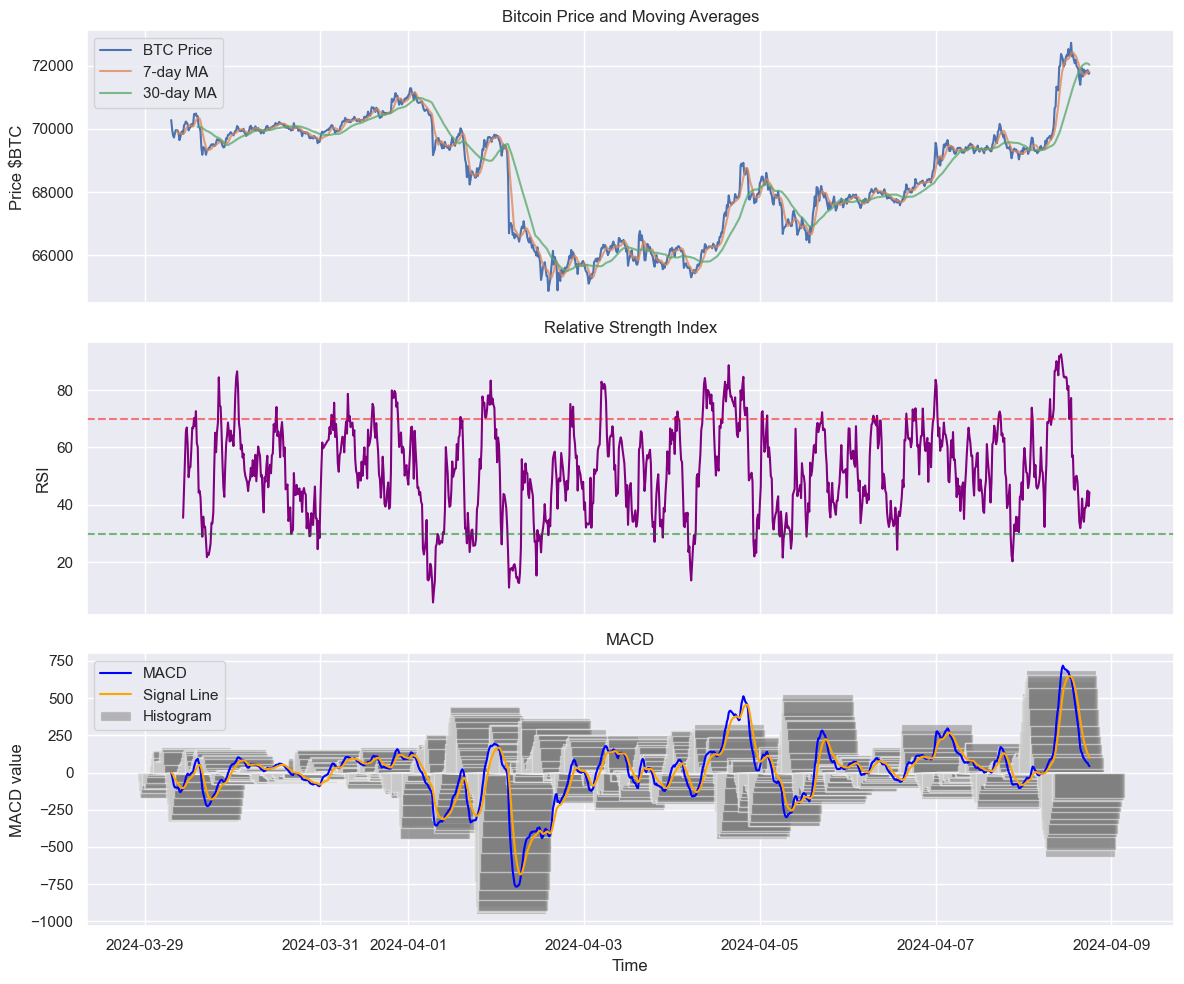

Descriptive Statistics for RSI:
count    987.000000
mean      51.987295
std       16.193857
min        5.992470
25%       40.602284
50%       51.804442
75%       63.958024
max       92.492015
Name: RSI, dtype: float64

Descriptive Statistics for MACD:
count    1000.000000
mean       10.236131
std       196.475850
min      -767.180491
25%       -70.222460
50%        30.111689
75%        94.091500
max       718.435465
Name: MACD, dtype: float64


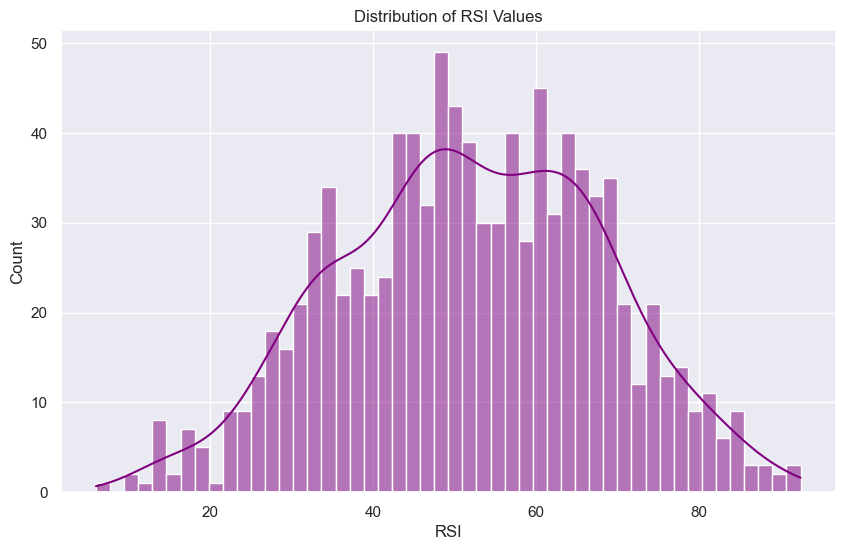

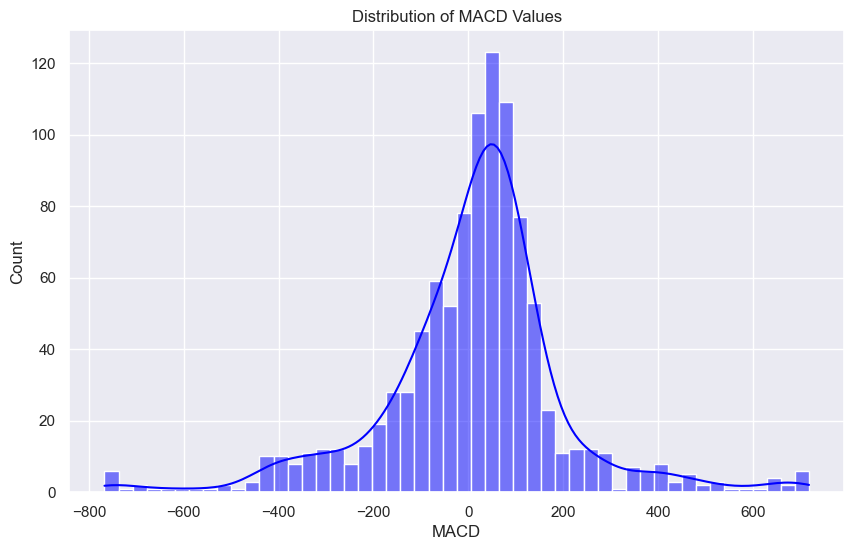

In [84]:
# Function to calculate Relative Strength Index (RSI) without using talib
def rsi_calculation(series, period=14):
    delta = series.diff()  # Calculate price differences
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()  # Calculate average gain
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()  # Calculate average loss

    rs = gain / loss  # Calculate Relative Strength
    rsi = 100 - (100 / (1 + rs))  # Calculate RSI
    return rsi

# Calculate RSI for Bitcoin data
btc_df['RSI'] = rsi_calculation(btc_df['Price $BTC'])

# Function to calculate Moving Average Convergence Divergence (MACD) without using talib
def macd_calculation(series, fast_period=12, slow_period=26, signal_period=9):
    exp1 = series.ewm(span=fast_period, adjust=False).mean()  # Calculate fast EMA
    exp2 = series.ewm(span=slow_period, adjust=False).mean()  # Calculate slow EMA
    macd = exp1 - exp2  # Calculate MACD line
    signal_line = macd.ewm(span=signal_period, adjust=False).mean()  # Calculate signal line
    histogram = macd - signal_line  # Calculate MACD histogram
    return macd, signal_line, histogram

# Calculate MACD 
btc_df['MACD'], btc_df['MACD_signal'], btc_df['MACD_hist'] = macd_calculation(btc_df['Price $BTC'])

# Calculate 7d MA 
btc_df['MA_7'] = btc_df['Price $BTC'].rolling(window=7).mean()

# Calculate 30d MA
btc_df['MA_30'] = btc_df['Price $BTC'].rolling(window=30).mean()

# Plotting Price 7d MA and 30d MA
fig, ax = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Plot Price and Moving Averages
ax[0].plot(btc_df['Time'], btc_df['Price $BTC'], label='BTC Price')
ax[0].plot(btc_df['Time'], btc_df['MA_7'], label='7-day MA', alpha=0.75)
ax[0].plot(btc_df['Time'], btc_df['MA_30'], label='30-day MA', alpha=0.75)
ax[0].set_title('Bitcoin Price and Moving Averages')
ax[0].set_ylabel('Price $BTC')
ax[0].legend()

# Plot RSI
ax[1].plot(btc_df['Time'], btc_df['RSI'], color='purple')
ax[1].axhline(70, linestyle='--', alpha=0.5, color='red')
ax[1].axhline(30, linestyle='--', alpha=0.5, color='green')
ax[1].set_title('Relative Strength Index')
ax[1].set_ylabel('RSI')

# Plot MACD
ax[2].plot(btc_df['Time'], btc_df['MACD'], label='MACD', color='blue')
ax[2].plot(btc_df['Time'], btc_df['MACD_signal'], label='Signal Line', color='orange')
ax[2].bar(btc_df['Time'], btc_df['MACD_hist'] * 3, label='Histogram', color='grey', alpha=0.5)
ax[2].set_title('MACD')
ax[2].set_ylabel('MACD value')
ax[2].set_xlabel('Time')
ax[2].legend()

plt.tight_layout()
plt.show()

# Descriptive statistics for RSI and MACD
print("Descriptive Statistics for RSI:")
print(btc_df['RSI'].describe())
print("\nDescriptive Statistics for MACD:")
print(btc_df['MACD'].describe())

# Plot distribution of RSI values
plt.figure(figsize=(10, 6))
sns.histplot(btc_df['RSI'].dropna(), kde=True, color="purple", bins=50)
plt.title('Distribution of RSI Values')
plt.show()

# Plot distribution of MACD values
plt.figure(figsize=(10, 6))
sns.histplot(btc_df['MACD'].dropna(), kde=True, color="blue", bins=50)
plt.title('Distribution of MACD Values')
plt.show()


This code section does technical analysis of Bitcoin price data and visualises it with Matplotlib and Seaborn.

#### RSI and MACD Calculations
The code provides routines that calculate the Relative Strength Index (RSI) and Moving Average Convergence Divergence (MACD) without relying on other libraries such as 'talib'. These indicators offer insight into price momentum and trend strength.

#### Graphing Price, RSI and MACD
Three subplots are generated to show the Bitcoin price, RSI and MACD values over time. The first subplot shows the Bitcoin price together with the 7-day and 30-day moving averages. The second subplot displays the RSI values at the overbought (70) and oversold (30) criteria. The third subplot shows the MACD and its components (signal line and histogram).

#### Descriptive Statistics
The RSI and MACD distributions are summarised using descriptive statistics, which provide insights into their usual values and variability.

#### Distribution Plots
Histograms are used to show the distribution of RSI and MACD values. various plots provide information on the frequency and range of various indicators, which aids in evaluating market mood and potential trading signals.

## Feature Preperation

In [87]:
# Normalise features using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler

# Define features to be normalised
features = ['Price $BTC', 'RSI', 'MACD']

# Initialise MinMaxScaler with feature range between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Min-Max scaling to given features
btc_df_scaled = scaler.fit_transform(btc_df[features])

# Convert scaled data back to DataFrame for convenience
btc_df_scaled = pd.DataFrame(btc_df_scaled, columns=features)

# Add 'Time' column back to the scaled DataFrame
btc_df_scaled['Time'] = btc_df['Time']

##### Normalising Features

This code snippet normalises features using the Min-Max scaling algorithm from the'sklearn.preprocessing' module. The characteristics involve Bitcoin price ('Price $BTC'), Relative Strength Index ('RSI') and Moving Average Convergence Divergence ('MACD'). 

A 'MinMaxScaler' is used for sizing the features within the 0 to 1 range. For ease of use, the scaled data is converted back to a DataFrame while retaining the original time series information.


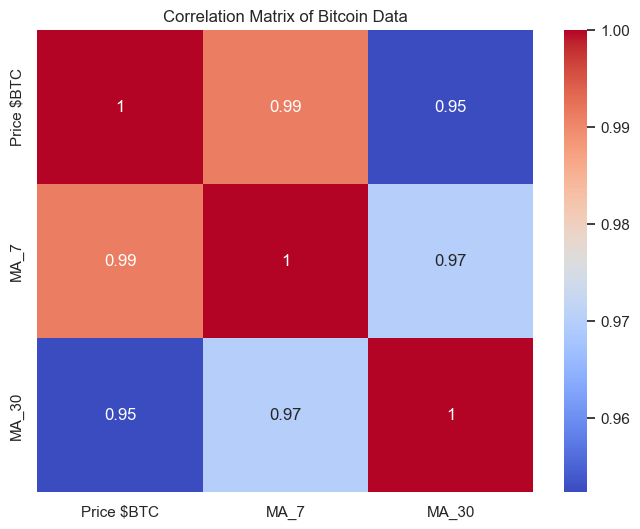

In [83]:
# Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(btc_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Bitcoin Data')
plt.show()

We use Seaborn's 'heatmap' function to visualise correlations between variables in the DataFrame. The annotations provide correlation coefficients.

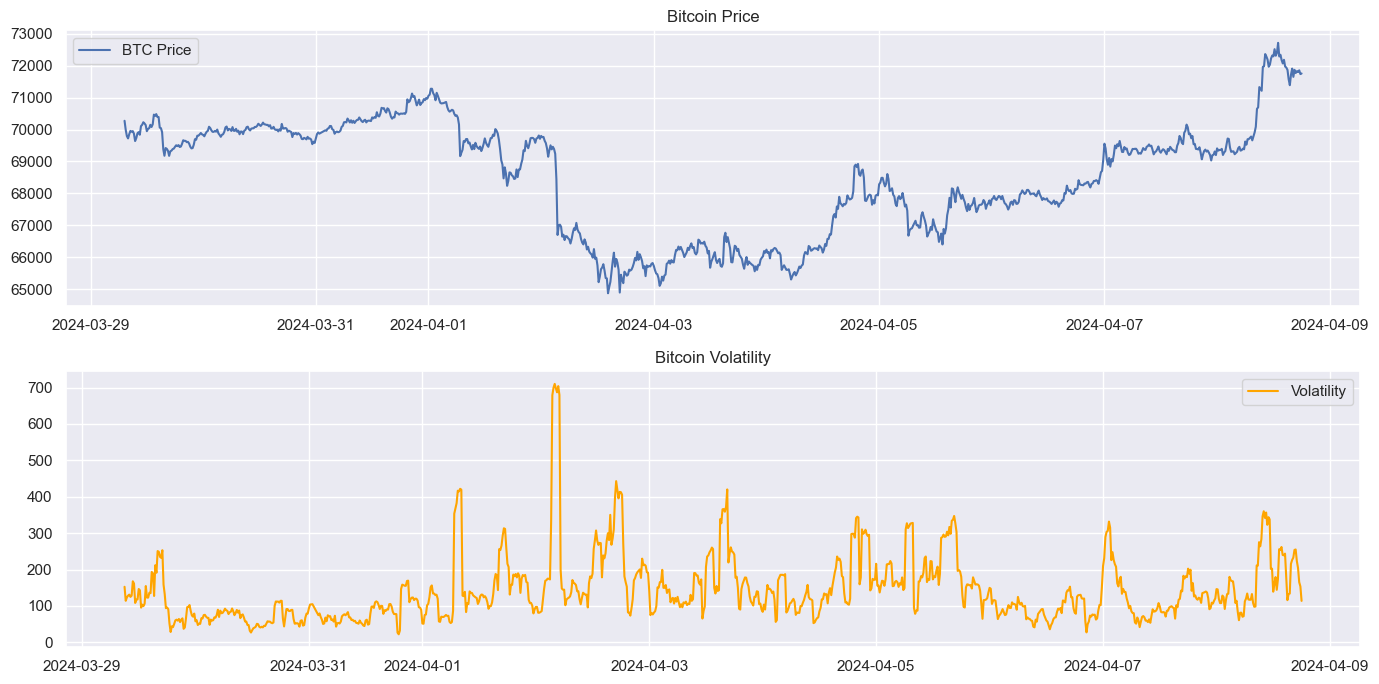

In [86]:
# Volatility Analysis
btc_df['Price Change'] = btc_df['Price $BTC'].diff()  # Calculate price changes
btc_df['Volatility'] = btc_df['Price Change'].rolling(window=7).std()  # Calculate rolling standard deviation for volatility

# Plot Bitcoin price and volatility
plt.figure(figsize=(14, 7))

# Subplot for Bitcoin price
plt.subplot(2, 1, 1)
plt.plot(btc_df['Time'], btc_df['Price $BTC'], label='BTC Price')
plt.title('Bitcoin Price')
plt.legend()

# Subplot for Bitcoin volatility
plt.subplot(2, 1, 2)
plt.plot(btc_df['Time'], btc_df['Volatility'], label='Volatility', color='orange')
plt.title('Bitcoin Volatility')
plt.legend()

plt.tight_layout()
plt.show()

#### Volatility Analysis.

This section analyses Bitcoin's volatility. To evaluate volatility, the code estimates the daily price change as well as the rolling standard deviation of price changes over a seven-day period.

Two subplots are created for visualisation:
1. **Bitcoin Price** - Shows the trend of Bitcoin values over time.
2. **Bitcoin Volatility** - Shows the volatility of Bitcoin values as measured by the rolling standard deviation of price movements.

##  Feature Correlation

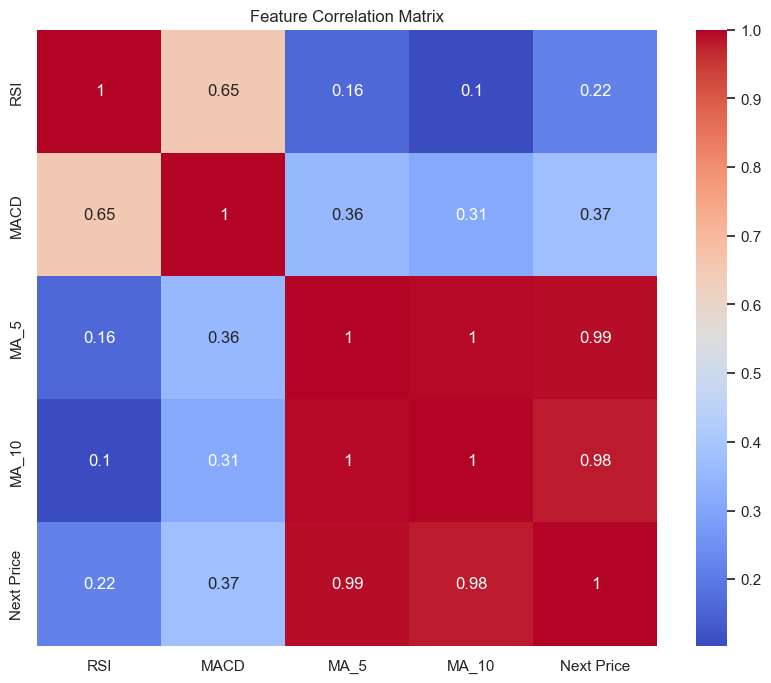

In [90]:
# Calculate Moving Averages for Feature Correlation
btc_df['MA_5'] = btc_df['Price $BTC'].rolling(window=5).mean()  # 5d MA
btc_df['MA_10'] = btc_df['Price $BTC'].rolling(window=10).mean()  # 10d MA

# Feature columns for corelation analysis
feature_cols = ['RSI', 'MACD', 'MA_5', 'MA_10']

# 'Price $BTC' to get actual price for prediction
btc_df['Next Price'] = btc_df['Price $BTC'].shift(-1)

# Calculate correlation matrix
corr = btc_df[feature_cols + ['Next Price']].corr()

# Plot correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

### Computing Moving Averages for Feature Correlation

In this part, moving averages for Bitcoin price data are created to investigate their relationship with other properties. Moving averages with window widths of 5 and 10 are calculated using the 'rolling' approach.

Correlation analysis takes into account several aspects, including the Relative Strength Index (RSI), Moving Average Convergence Divergence (MACD) and freshly generated moving averages (MA_5 and MA_10). Furthermore, the correlation analysis includes the goal prediction feature, 'Next Price'.

Seaborn's 'heatmap' function generates a heatmap of the correlation matrix. This heatmap illustrates the correlation coefficients between multiple features, offering data about their interactions and possible predictive capacity.

In [91]:
# Convert correlation matrix to string for printing
correlation_text = corr.to_string()

# Print correlation matrix
print(correlation_text)

                 RSI      MACD      MA_5     MA_10  Next Price
RSI         1.000000  0.653155  0.162347  0.103240    0.216284
MACD        0.653155  1.000000  0.355074  0.311072    0.373445
MA_5        0.162347  0.355074  1.000000  0.995878    0.989592
MA_10       0.103240  0.311072  0.995878  1.000000    0.981522
Next Price  0.216284  0.373445  0.989592  0.981522    1.000000


## Memory Effect Analysis

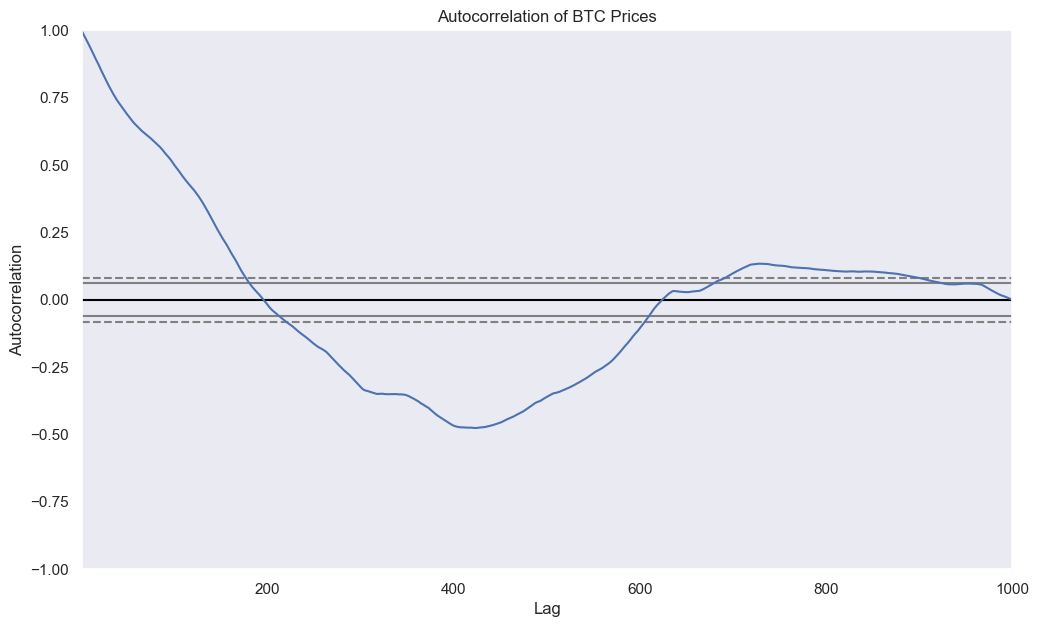

In [92]:
from pandas.plotting import autocorrelation_plot  # Autocorrelation_plot function used for MEA 

# Plot autocorrelation of Bitcoin prices
plt.figure(figsize=(12, 7))
autocorrelation_plot(btc_df['Price $BTC'].dropna())
plt.title('Autocorrelation of BTC Prices')
plt.show()

#### Autocorrelation Analysis.

This code snippet leverages the 'autocorrelation_plot' function from the 'pandas.plotting' module to investigate Bitcoin price autocorrelation.

The autocorrelation chart is made by comparing the autocorrelation coefficients to the number of delays. This visual representation assists in identifying patterns or relationships in the time series data.

Large peaks or troughs on the figure suggest significant positive or negative autocorrelation at certain lag values. This information is useful in understanding the underlying structure and dynamics of the Bitcoin price time series data.


## Data Preparation and Scaling

In [93]:
print("Data before scaling:")
print(btc_df[['Price $BTC', 'RSI', 'MACD']].head())

print("\nData after scaling:")
print(btc_df.head())  

Data before scaling:
   Price $BTC  RSI       MACD
0    70275.99  NaN   0.000000
1    69991.57  NaN -22.688775
2    69794.00  NaN -55.966889
3    69723.23  NaN -87.047156
4    69855.63  NaN -99.843979

Data after scaling:
                 Time  Price $BTC  MA_7  MA_30  RSI       MACD  MACD_signal  \
0 2024-03-29 07:15:00    70275.99   NaN    NaN  NaN   0.000000     0.000000   
1 2024-03-29 07:30:00    69991.57   NaN    NaN  NaN -22.688775    -4.537755   
2 2024-03-29 07:45:00    69794.00   NaN    NaN  NaN -55.966889   -14.823582   
3 2024-03-29 08:00:00    69723.23   NaN    NaN  NaN -87.047156   -29.268297   
4 2024-03-29 08:15:00    69855.63   NaN    NaN  NaN -99.843979   -43.383433   

   MACD_hist  Price Change  Volatility  MA_50  MA_200       MA_5  MA_10  \
0   0.000000           NaN         NaN    NaN     NaN        NaN    NaN   
1 -18.151020       -284.42         NaN    NaN     NaN        NaN    NaN   
2 -41.143307       -197.57         NaN    NaN     NaN        NaN    NaN   
3 -

The first dataframe displays the original Bitcoin price data, RSI and MACD before scaling. The second dataframe shows the data after scaling, with each characteristic scaled from 0 to 1.

## Trend Analysis with Decomposition

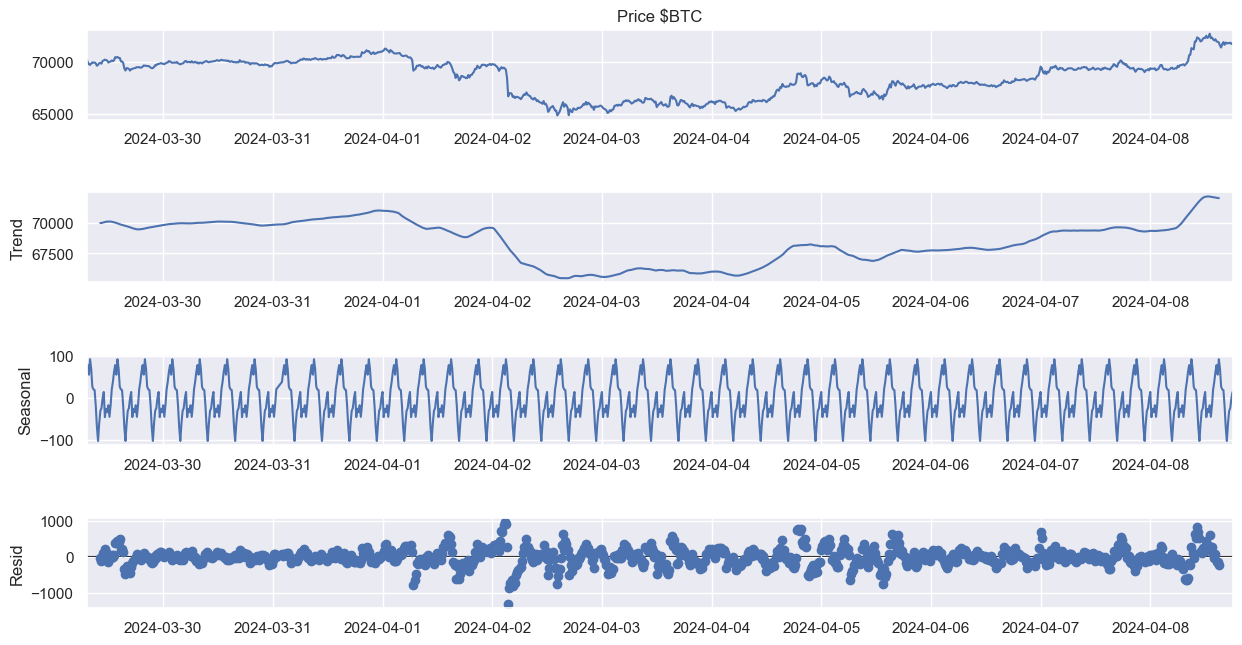

In [94]:
btc_df['Time'] = pd.to_datetime(btc_df['Time'])  # Convert 'Time' column to datetime format
btc_df.set_index('Time', inplace=True)  # Set 'Time' column as the index

from statsmodels.tsa.seasonal import seasonal_decompose  # Import seasonal_decompose function to see the seasonal trends in BTC

# Decompose Bitcoin price time series using additive model
decomposition = seasonal_decompose(btc_df['Price $BTC'], model='additive', period=24)  

# Plot the decomposition components
fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.show()

### Bitcoin Price Seasonal Decomposition

This code uses seasonal decomposition from'statsmodels.tsa.seasonal' to split Bitcoin price data into trend, seasonal, and residual components.

The 'seasonal_decompose' function uses an additive framework with a period of 24 (modify according to data frequency).

The resulting graphic depicts trend, seasonal and residual patterns, helping in understanding Bitcoin price swings.

In [ ]:
from statsmodels.tsa.stattools import adfuller  # Import adfuller function for the ADF Test

# ADF test on Bitcoin price time series
adf_test = adfuller(btc_df['Price $BTC'].dropna(), autolag='AIC')

# Print ADF Statistic p-value and Critical Values
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation of results
if adf_test[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

- ADF Statistic: -1.127830
- p-value: 0.703847
- Critical Values:
   - 	1%: -3.437
   -    5%: -2.864
   -	10%: -2.568
   

The time series is not stationary.

### The Augmented Dickey-Fuller Test for Stationarity

To examine the stationarity of the Bitcoin price time series, the code applies the Augmented Dickey-Fuller (ADF) test with 'statsmodels.tsa.stattools'.

The ADF test statistic and p-value are printed to assess consistency. In addition, significant values at various significance levels are presented.

Relying on the p-value, the algorithm interprets the test findings. **If the p-value is less than 0.05, the time series is termed stationary; otherwise, it is classified as non-stationary.**


# EDA on The Daily Timeframe

In [ ]:
# Fetch Bitcoin data with a larger limit of 1000 data points
candles = client.get_klines(symbol='BTCUSDT', interval=Client.KLINE_INTERVAL_1DAY, limit=1000)

# Extract close prices and times from the candlestick data
price = np.array([float(candle[4]) for candle in candles])  # Closing prices
time = np.array([int(candle[0]) for candle in candles])  # Timestamps

# Convert timestamps to a human-readable format
t = np.array([datetime.fromtimestamp(time[i]/1000).strftime('%Y-%m-%d %H:%M:%S') for i in range(len(time))])

# Create a DataFrame containing time and Bitcoin price data
btc_daily_df = pd.DataFrame({'Time': t, 'Price $BTC': price})

In [98]:
# Descriptive Statistics
print(btc_daily_df['Price $BTC'].describe())

count     1000.00000
mean     34803.55919
std      13588.01148
min      15781.29000
25%      23545.56750
50%      30287.07500
75%      43334.23750
max      73072.41000
Name: Price $BTC, dtype: float64


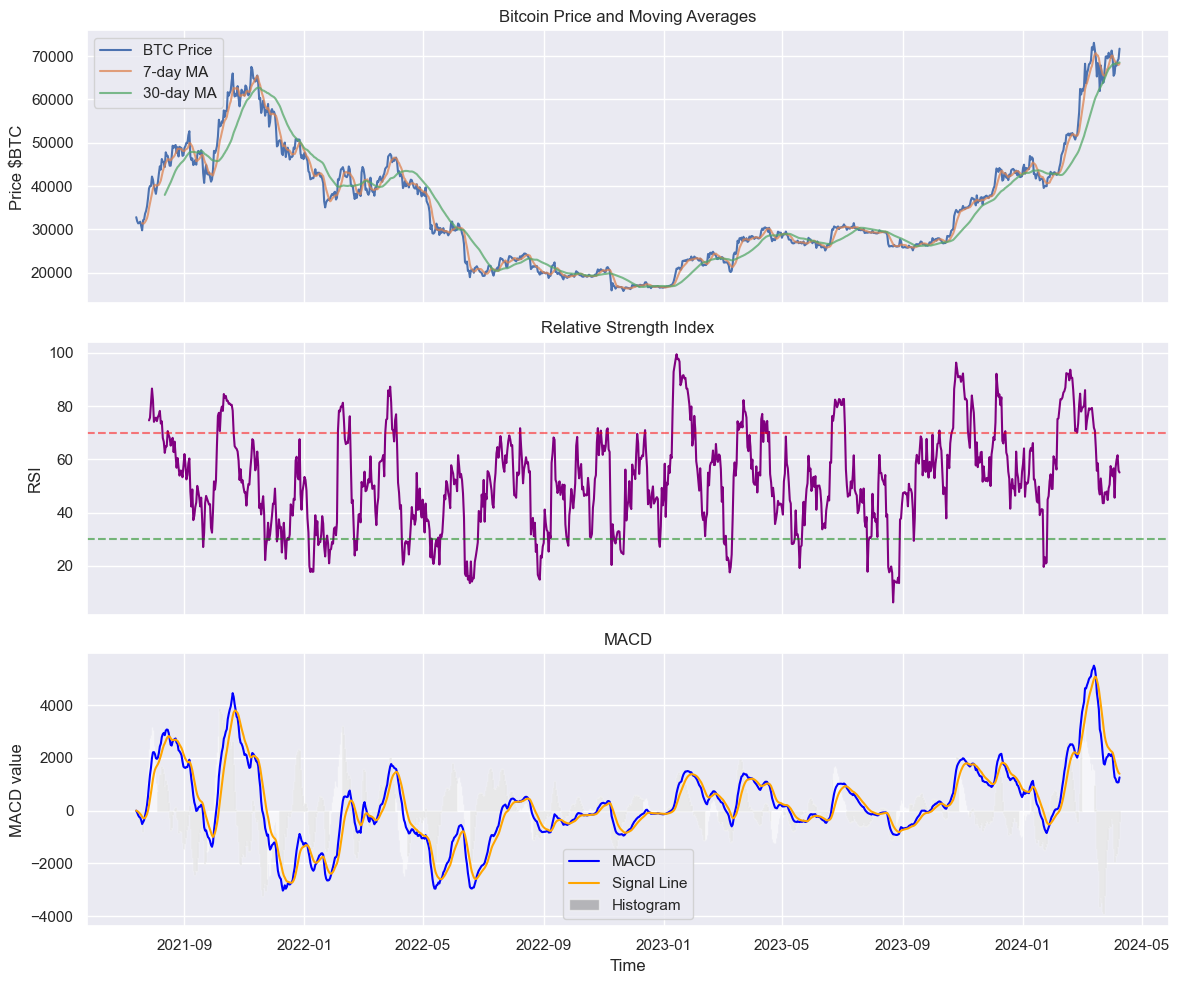

Descriptive Statistics for RSI:
count    987.000000
mean      52.566718
std       18.134173
min        6.289216
25%       40.135769
50%       51.703312
75%       64.697182
max       99.426709
Name: RSI, dtype: float64

Descriptive Statistics for MACD:
count    1000.000000
mean      236.980566
std      1442.604324
min     -3031.854725
25%      -543.670917
50%        49.358184
75%      1051.821017
max      5498.508590
Name: MACD, dtype: float64


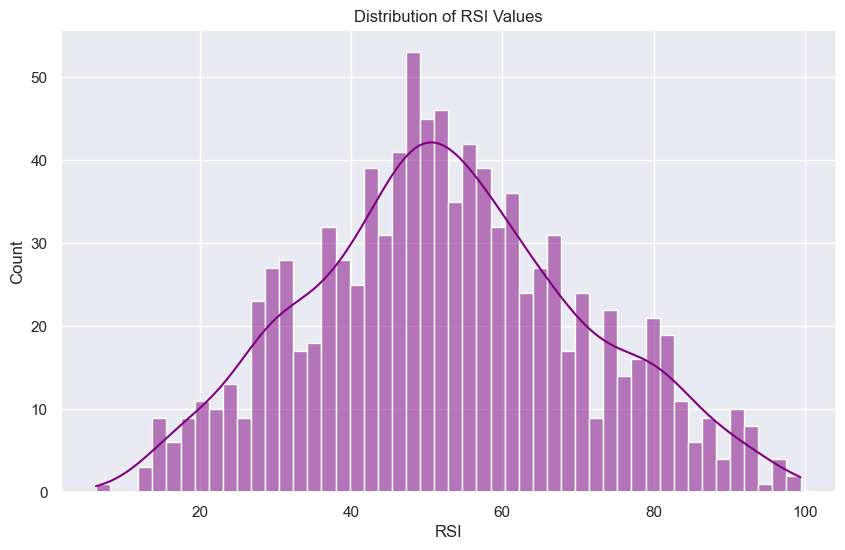

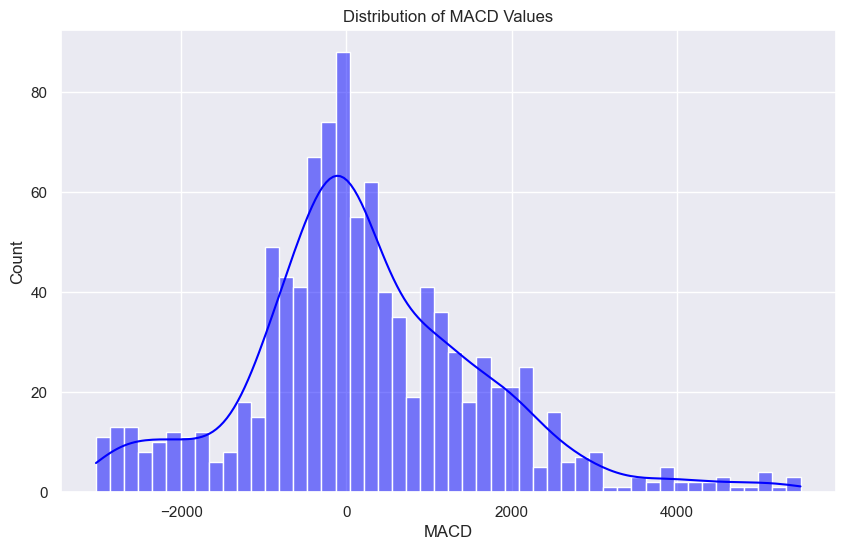

In [101]:
# Calculate Relative Strength Index (RSI) 
def rsi_calculation(series, period=14):
    delta = series.diff()  # Calculate price differences
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()  # Calculate average gain 
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()  # Calculate average loss 

    rs = gain / loss  # Calculate Relative Strength
    rsi = 100 - (100 / (1 + rs))  # Calculate RSI
    return rsi

# Calculate RSI for Bitcoin daily data
btc_daily_df['RSI'] = rsi_calculation(btc_daily_df['Price $BTC'])

# Function to calculate Moving Average Convergence Divergence (MACD) without using talib
def macd_calculation(series, fast_period=12, slow_period=26, signal_period=9):
    exp1 = series.ewm(span=fast_period, adjust=False).mean()  # Calculate fast EMA
    exp2 = series.ewm(span=slow_period, adjust=False).mean()  # Calculate slow EMA
    macd = exp1 - exp2  # MACD line
    signal_line = macd.ewm(span=signal_period, adjust=False).mean()  # Signal line
    histogram = macd - signal_line  # MACD histogram
    return macd, signal_line, histogram

# Calculate MACD
btc_daily_df['MACD'], btc_daily_df['MACD_signal'], btc_daily_df['MACD_hist'] = macd_calculation(btc_daily_df['Price $BTC'])

# Calculate 7d and 30d moving averages
btc_daily_df['MA_7'] = btc_daily_df['Price $BTC'].rolling(window=7).mean()
btc_daily_df['MA_30'] = btc_daily_df['Price $BTC'].rolling(window=30).mean()

# Plotting Price, RSI and MACD
fig, ax = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Price
ax[0].plot(btc_daily_df['Time'], btc_daily_df['Price $BTC'], label='BTC Price')
ax[0].plot(btc_daily_df['Time'], btc_daily_df['MA_7'], label='7-day MA', alpha=0.75)
ax[0].plot(btc_daily_df['Time'], btc_daily_df['MA_30'], label='30-day MA', alpha=0.75)
ax[0].set_title('Bitcoin Price and Moving Averages')
ax[0].set_ylabel('Price $BTC')
ax[0].legend()

# RSI
ax[1].plot(btc_daily_df['Time'], btc_daily_df['RSI'], color='purple')
ax[1].axhline(70, linestyle='--', alpha=0.5, color='red')
ax[1].axhline(30, linestyle='--', alpha=0.5, color='green')
ax[1].set_title('Relative Strength Index')
ax[1].set_ylabel('RSI')

# MACD
ax[2].plot(btc_daily_df['Time'], btc_daily_df['MACD'], label='MACD', color='blue')
ax[2].plot(btc_daily_df['Time'], btc_daily_df['MACD_signal'], label='Signal Line', color='orange')
ax[2].bar(btc_daily_df['Time'], btc_daily_df['MACD_hist'] * 3, label='Histogram', color='grey', alpha=0.5)
ax[2].set_title('MACD')
ax[2].set_ylabel('MACD value')
ax[2].set_xlabel('Time')
ax[2].legend()

plt.tight_layout()
plt.show()

# Descriptive statistics for RSI and MACD
print("Descriptive Statistics for RSI:")
print(btc_daily_df['RSI'].describe())
print("\nDescriptive Statistics for MACD:")
print(btc_daily_df['MACD'].describe())

# Plotting distribution of RSI values
plt.figure(figsize=(10, 6))
sns.histplot(btc_daily_df['RSI'].dropna(), kde=True, color="purple", bins=50)
plt.title('Distribution of RSI Values')
plt.show()

# Plotting distribution of MACD values
plt.figure(figsize=(10, 6))
sns.histplot(btc_daily_df['MACD'].dropna(), kde=True, color="blue", bins=50)
plt.title('Distribution of MACD Values')
plt.show()

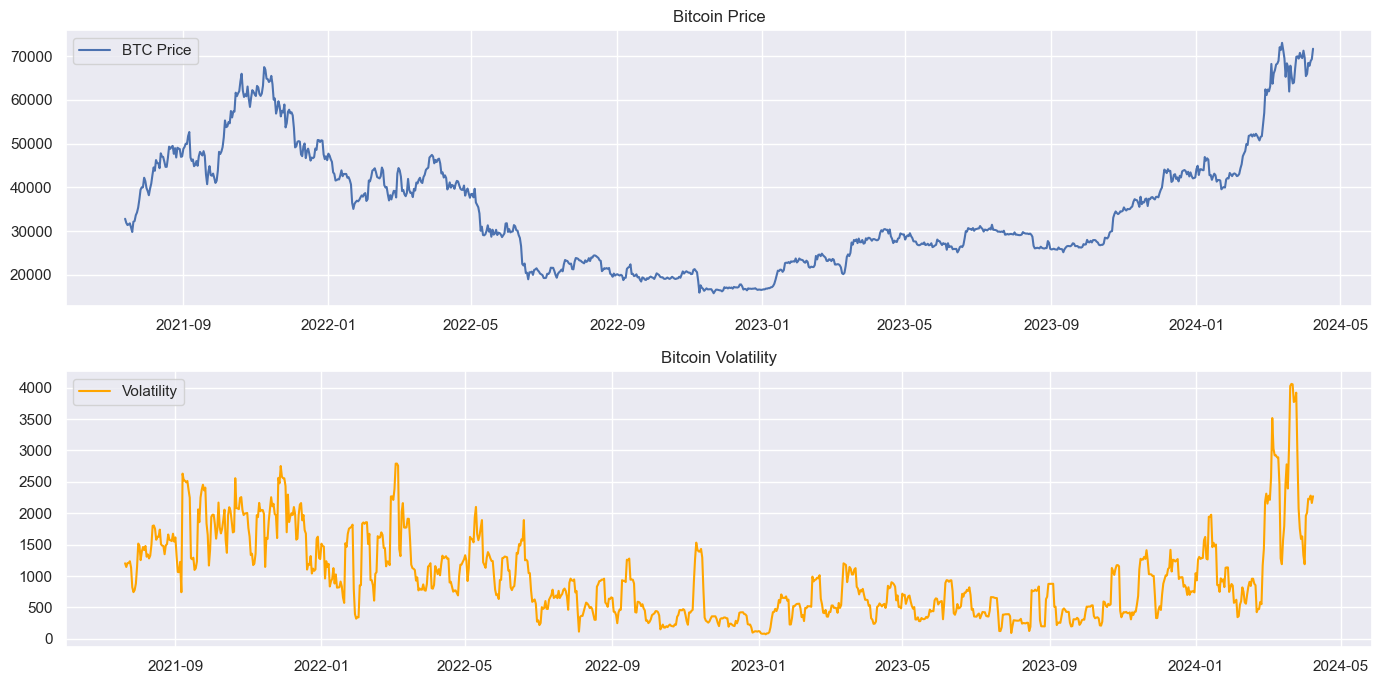

In [102]:
# Volatility Analysis
btc_daily_df['Price Change'] = btc_daily_df['Price $BTC'].diff()  # Price changes
btc_daily_df['Volatility'] = btc_daily_df['Price Change'].rolling(window=7).std()  # Rolling standard deviation for volatility

# Plot Bitcoin price and volatility
plt.figure(figsize=(14, 7))

# Subplot for Bitcoin price
plt.subplot(2, 1, 1)
plt.plot(btc_daily_df['Time'], btc_daily_df['Price $BTC'], label='BTC Price')
plt.title('Bitcoin Price')
plt.legend()

# Subplot for Bitcoin volatility
plt.subplot(2, 1, 2)
plt.plot(btc_daily_df['Time'], btc_daily_df['Volatility'], label='Volatility', color='orange')
plt.title('Bitcoin Volatility')
plt.legend()

plt.tight_layout()
plt.show()

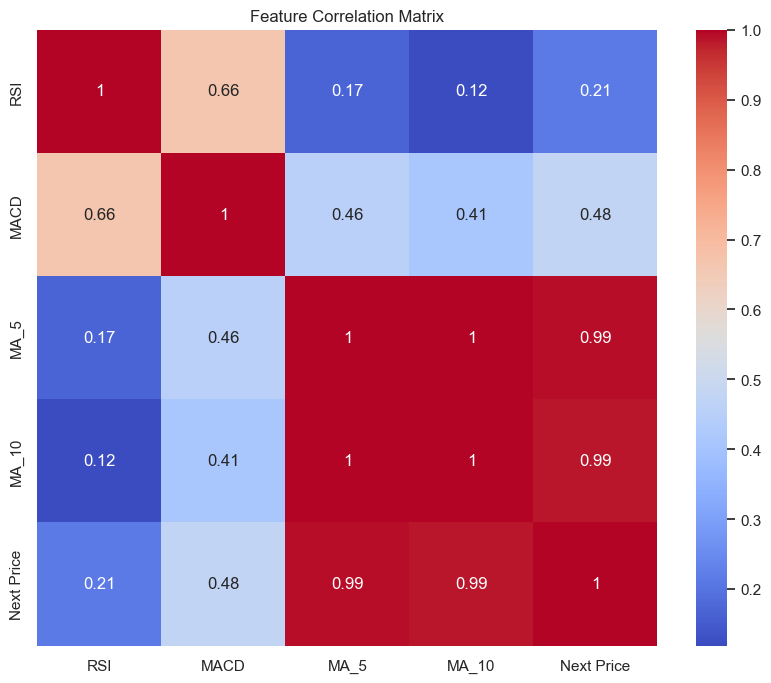

In [103]:
# Calculate MA for Feature Correlation
btc_daily_df['MA_5'] = btc_daily_df['Price $BTC'].rolling(window=5).mean()  # Calculate 5-day moving average
btc_daily_df['MA_10'] = btc_daily_df['Price $BTC'].rolling(window=10).mean()  # Calculate 10-day moving average

# Feature columns for correlation analysis
feature_cols = ['RSI', 'MACD', 'MA_5', 'MA_10']

# Shift 'Price $BTC' to get actualy price for prediction
btc_daily_df['Next Price'] = btc_daily_df['Price $BTC'].shift(-1)

# Calculate correlation matrix
corr = btc_daily_df[feature_cols + ['Next Price']].corr()

# Plot correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [104]:
# Convert correlation matrix to string for printing
correlation_text = corr.to_string()

# Print correlation matrix
print(correlation_text)

                 RSI      MACD      MA_5     MA_10  Next Price
RSI         1.000000  0.664481  0.169676  0.119402    0.212644
MACD        0.664481  1.000000  0.455078  0.413688    0.476112
MA_5        0.169676  0.455078  1.000000  0.996904    0.992141
MA_10       0.119402  0.413688  0.996904  1.000000    0.985901
Next Price  0.212644  0.476112  0.992141  0.985901    1.000000


### References
- Lopez de Prado, M., 2018. *Advances in Financial Machine Learning*. Wiley. 
- Chan, E.P., 2017. *Machine Trading: Deploying Computer Algorithms to Conquer the Markets*. Wiley.
- Hilpisch, Y., 2018. *Python for Finance: Mastering Data-Driven Finance*. O'Reilly Media.
- Binance, 2021. API Documentation. Available at: https://binance-docs.github.io/apidocs/spot/en/#general-info 
- Pandas development team, 2021. Time Series / Date functionality — pandas 1.2.4 documentation. Available at: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html 